In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

Perform feature normalization so that all features are on a standardized scale.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("assets/spam.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

Train SVC classifier with default hyper-parameters

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score

svm = SVC().fit(X_train, y_train)

svm_predicted = svm.predict(X_test)
acc_score = round(svm.score(X_test, y_test),2)
rec_score = round(recall_score(y_test, svm_predicted),2)
pre_score = round(precision_score(y_test, svm_predicted),2)  

print("Accuracy Score: ", acc_score)
print("Recall Score: ", rec_score)
print("Precision Score: ", pre_score)

Accuracy Score:  0.92
Recall Score:  0.87
Precision Score:  0.93


#### Let's see if we can improve the "Recall" evaluation metric by changing the parameters

In [20]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3,scoring = "recall")
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.011 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.004 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.007 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.019 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.015 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.469 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.570 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(C=1000, gamma=0.001),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall', verbose=3)

In [21]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [24]:
svm = SVC(C = 1000, gamma = 0.001, kernel = 'rbf').fit(X_train, y_train)

svm_predicted = svm.predict(X_test)
rec_score_tuned = round(recall_score(y_test, svm_predicted),2)

print("Recall Score Default Parameters: ", rec_score)
print("Recall Score Optimal Parameters: ", rec_score_tuned)


Recall Score Default Parameters:  0.87
Recall Score Optimal Parameters:  0.9


By tuning C and gamma, we were able to increase the recall score by 3%

#### I will create a precision-recall curve and a ROC (Receiver Operating Characteristic) curve for a train logisti regression spam e-mail classifier.

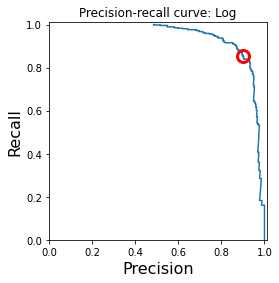

The optimal balance of precision and recall occurs at: Recall = 0.8521739130434782 , Precision = 0.9011494252873563


In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

log = LogisticRegression().fit(X_train, y_train)
y_scores = log.decision_function(X_test)

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
rec = closest_zero_r

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: Log")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

print("The optimal balance of precision and recall occurs at: Recall =", 
       closest_zero_r, ", Precision =", closest_zero_p)  


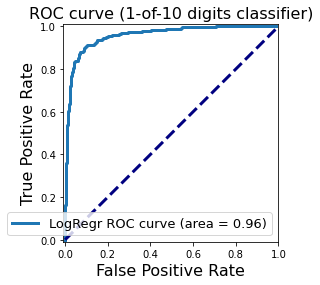

In [28]:
# ROC Curve    

fpr_log, tpr_log, _ = roc_curve(y_test, y_scores)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_log, tpr_log, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_log))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()